In [1]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt


In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
# 下载MNIST数据集并生成DataSet对象
# 使用OneHot编码处理标记
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [119]:
bacth_img,_=mnist.train.next_batch(32)

In [120]:
img=bacth_img
# img=(img*255).astype(np.uint8).reshape([28,28])
# plt.imshow(img)
# plt.show()

In [121]:
type(bacth_img[1][1])

numpy.float32

In [122]:
import skimage

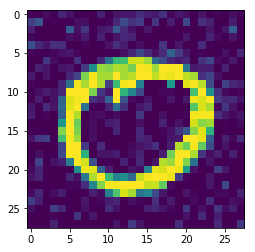

In [123]:
Img=skimage.util.random_noise(img , mode='gaussian' )
img=(Img[0]*255).astype(np.uint8).reshape([28,28])
plt.imshow(img)
plt.show()

In [124]:
Img.shape

(32, 784)

In [134]:
with tf.Graph().as_default() as g:
    inp_out=tf.placeholder(shape=[None,784],dtype=tf.float32)
    label=tf.placeholder(shape=[None,784],dtype=tf.float32)
    h=tf.keras.layers.Dense(128,activation=tf.nn.relu)(inp_out)
    out=tf.keras.layers.Dense(784,activation=tf.nn.sigmoid)(h)
    
    loss=tf.reduce_mean(tf.keras.losses.mean_squared_error(label,out))

0.23142534


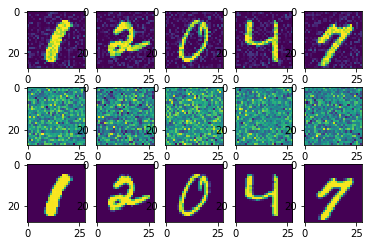

0.06786029


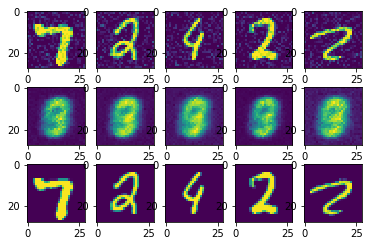

0.062118784


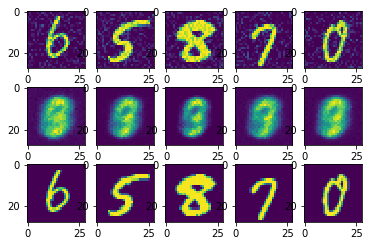

0.06223028


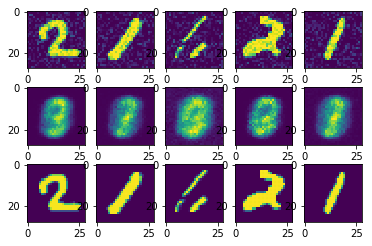

0.058967024


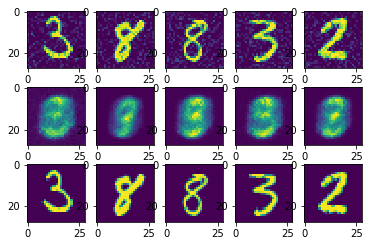

0.056985106


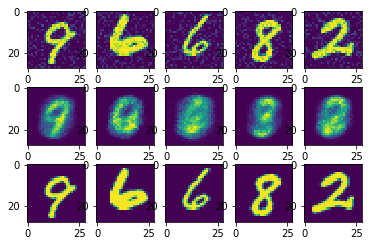

0.050307967


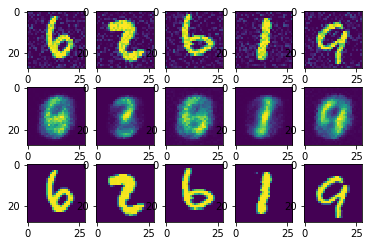

0.047502056


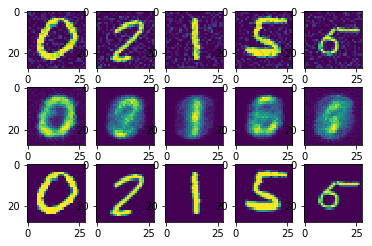

0.041962016


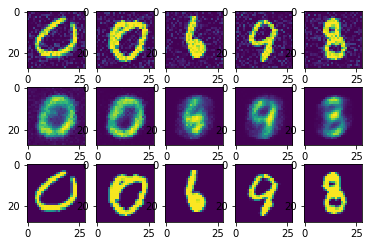

0.03914261


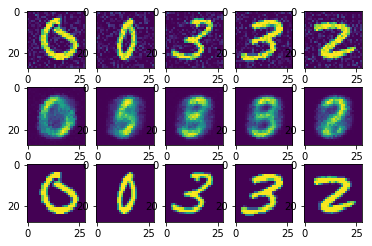

0.038509972


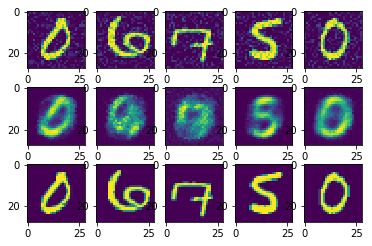

0.042644113


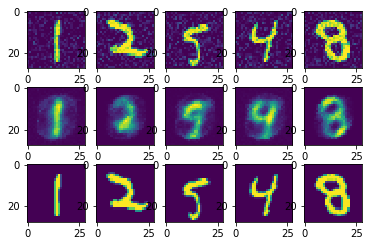

0.03699789


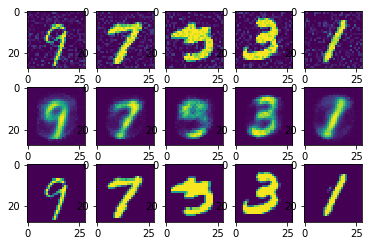

0.034328356


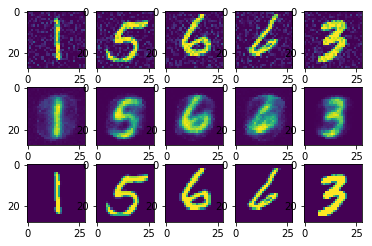

0.038209043


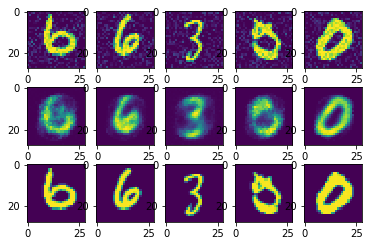

0.031710174


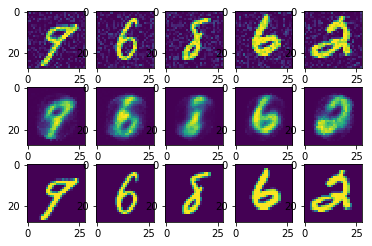

0.033856265


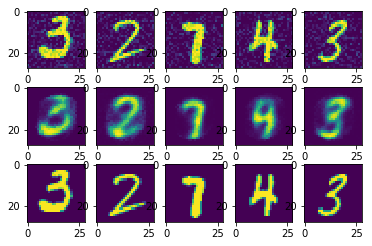

0.030033816


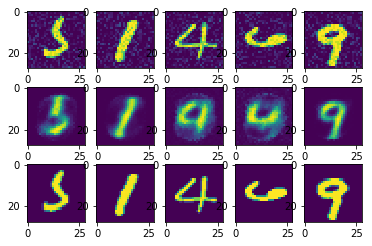

0.029467355


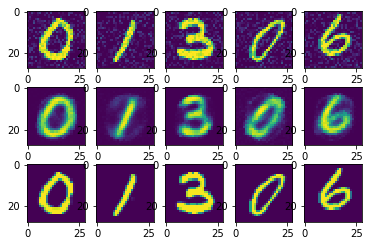

0.032701254


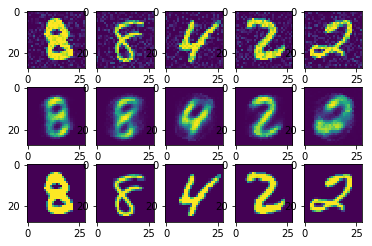

0.029497024


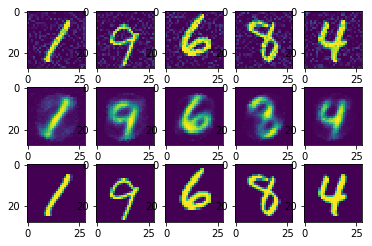

0.027316408


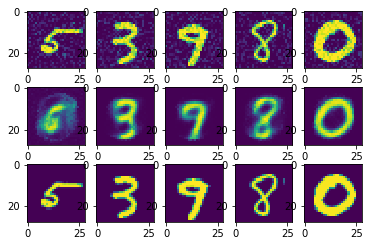

0.026331548


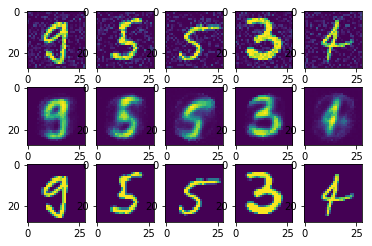

0.02507997


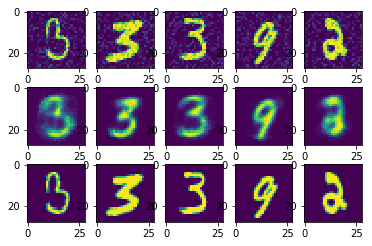

0.027276004


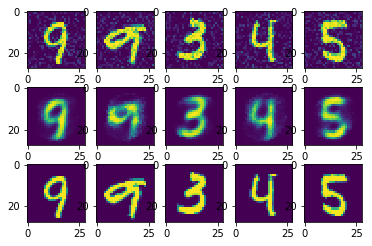

0.028022647


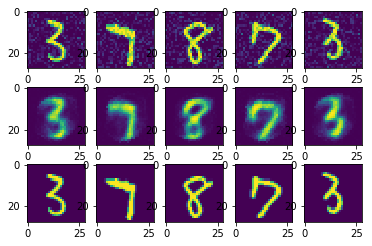

0.02575668


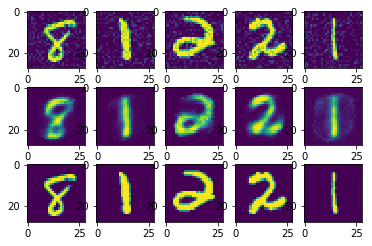

0.024772434


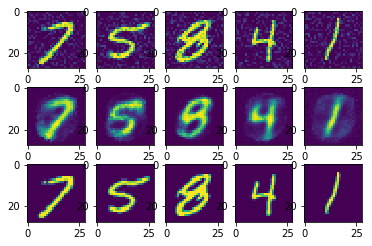

0.024482522


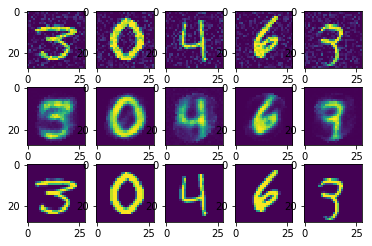

0.02533314


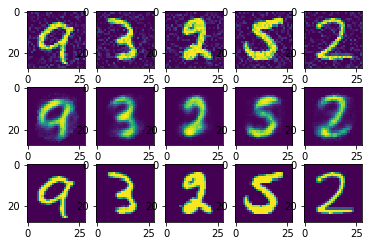

0.024833083


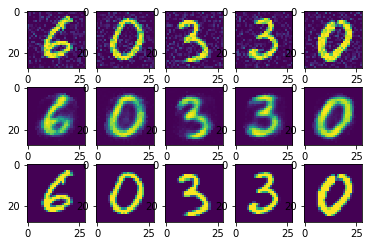

0.02042374


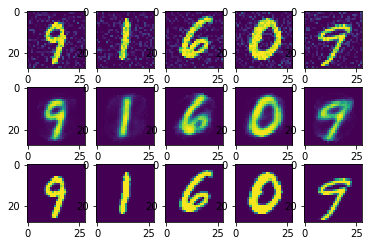

0.02251554


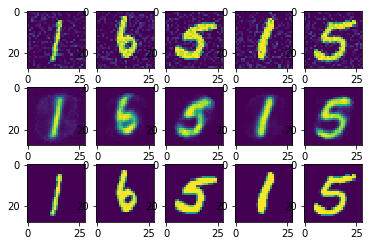

0.017768338


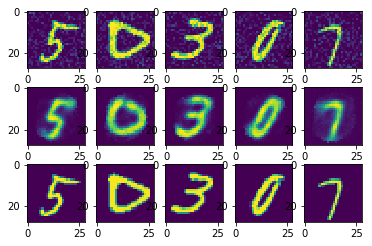

0.020949675


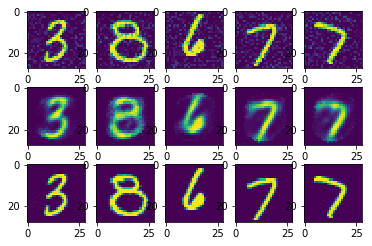

0.020550804


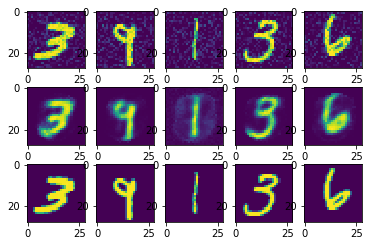

0.0186994


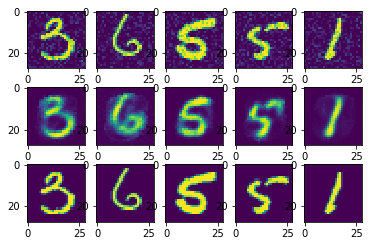

0.017518124


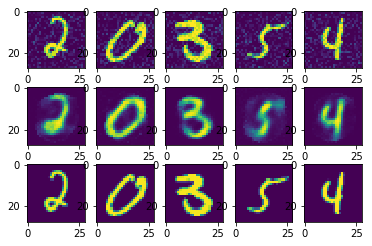

0.020705562


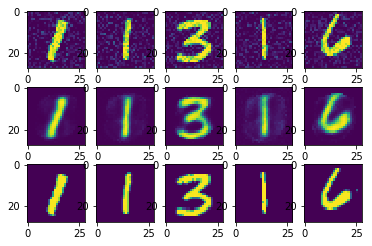

0.019556027


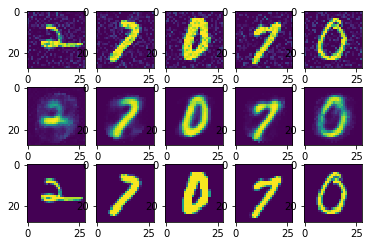

In [154]:
with tf.Session(graph=g) as sess:
    optim=tf.train.GradientDescentOptimizer(learning_rate=0.5)
    train_op=optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    for i in range(20000):
        bacth_img,_=mnist.train.next_batch(32)
        bacth_img_sound=skimage.util.random_noise(bacth_img , mode='gaussian' )
        bacth_img_sound=bacth_img_sound.astype(np.float32)
        res_loss,_=sess.run([loss,train_op],feed_dict={
            inp_out:bacth_img_sound,
            label:bacth_img
        })
        if  i % 500==0:
            print(res_loss)
            bacth_img,_=mnist.test.next_batch(5)
            bacth_img_sound=skimage.util.random_noise(bacth_img , mode='gaussian' )
            bacth_img_sound=bacth_img_sound.astype(np.float32)
            res_out=sess.run(out,feed_dict={
                inp_out:bacth_img_sound
            })
            for j in range(15):
                plt.subplot(3,5,j+1)
                img=np.array(bacth_img_sound[j] if j<5 else (res_out[j-5] if j<10 else bacth_img[j-10]) )
                img=(img*255).astype(np.uint8).reshape([28,28])
                plt.imshow(img)
            plt.show()